## EDA

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
cc0 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Consumer_Complaints.csv")
cc = cc0.copy()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
cc.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [0]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388558 entries, 0 to 1388557
Data columns (total 18 columns):
Date received                   1388558 non-null object
Product                         1388558 non-null object
Sub-product                     1153392 non-null object
Issue                           1388558 non-null object
Sub-issue                       843998 non-null object
Consumer complaint narrative    441618 non-null object
Company public response         505007 non-null object
Company                         1388558 non-null object
State                           1366069 non-null object
ZIP code                        1261924 non-null object
Tags                            189508 non-null object
Consumer consent provided?      789846 non-null object
Submitted via                   1388558 non-null object
Date sent to company            1388558 non-null object
Company response to consumer    1388557 non-null object
Timely response?                1388558 non-null obj

## Q1 Discard the rows where consumer complaint narrative is blank. How many rows does this yield?
- 441618 row.

In [0]:
cc = cc.dropna(subset = ['Consumer complaint narrative'])
print(cc0.shape)
print(cc.shape)

(1388558, 18)
(441618, 18)


### Q3 Draw a histogram of number of complaints by company name. What can you conclude about which institutions are causing the most complaints?

- Financial(Bank)institution
- The Equifax has the highest number of complaints


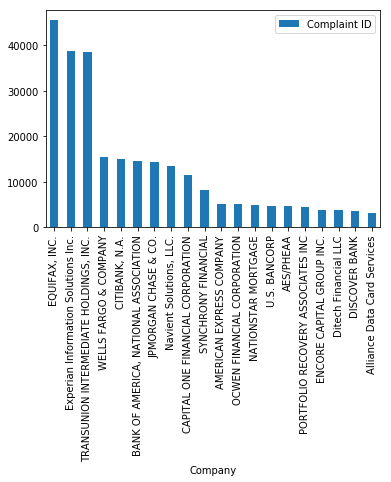

In [0]:
complaints_by_company = cc.groupby(by='Company')[['Complaint ID']].count()
top_20 = complaints_by_company.sort_values(by= "Complaint ID",ascending=False).head(20)
top_20.plot(kind='bar')

## Q4  Create a model to predict the product based on the consumer complaint narrative. 
### Step 1: Text Preprocessing
- covert to lower case
- remove numbers | punctuation | noise like 'xxxxx'
- remove stopwords
- lemmatization using spaCy

In [0]:
cc1 = cc.copy()
cc2 = cc1[['Consumer complaint narrative','Product']]
cc2.index = range(cc2.shape[0])
cc2.head()

,Consumer complaint narrative,Product
0,I don't even know half of this company I have ...,"Credit reporting, credit repair services, or o..."
1,I contacted XXXX and get better understanding ...,"Credit reporting, credit repair services, or o..."
2,I was served with a Summons to Answer in the t...,Debt collection
3,"I never had XXXX in my life, and I always use ...",Debt collection
4,Ideal Collection Services is attempting to col...,Debt collection


##### Compare results btw nltk and spaCy

First I tried nltk. Then I tried spaCy.
I choose **spaCy** for the following reason:   

- NLTK requires pos tag for lemma , wordnet pkg is used. But, NLTK is not providing, for example: bought > buy
- spaCy returns more succinct results
- spacy is more efficient for lemmatization

In [0]:
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
# from nltk.corpus import stopwords
import re
# from nltk.corpus import stopwords
import spacy

# get the stop words list form nltk, having trouble access using colab
# stop = stopwords.words('english')

newStopWords = ['dont','us'] # add customized words
stop.extend(newStopWords)

## colab needs extra step to download stopwords pkg, hence I copy the list from local run.
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'dont', 'us']
stop = stopwords

In [0]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
#https://www.machinelearningplus.com/nlp/lemmatization-examples-python/#comparingnltktextblobspacypatternandstanfordcorenlp

def preprocess1(s):
    lemmatizer = WordNetLemmatizer()
    re_sp= re.sub(r'([^a-z\s])|(x*)',"",s.lower()) # lower case, keep character|whitespace or character or XXX
    no_char = ' '.join( [w for w in re_sp.split() if len(w)>1]).strip() # remove sigle character
    stop = stopwords.words('english')
    newStopWords = ['dont','us']
    stop.extend(newStopWords)
    filtered_sp = [w for w in no_char.split(" ") if not w in stop] #remove stopwords    
    lemmaed_sp = [lemmatizer.lemmatize(item,get_wordnet_pos(item)) for item in filtered_sp]
    lemmaed_sp2 = ' '.join([x for x in lemmaed_sp])    
    return lemmaed_sp2

In [0]:
def preprocess2(s):
    nlp = spacy.load('en', disable=['parser', 'ner','tagger'])
    re_sp= re.sub(r'([^a-z\s])|(x*)','',s.lower()) # lower case, keep character|whitespace or character or XXX

    for w in stop:
      nlp.vocab[w].is_stop = True
      
    doc = nlp(re_sp)
    
    lemmaed_sp = ' '.join([token.lemma_ for token in doc if not token.is_stop])
    return lemmaed_sp

In [0]:
cc3 = cc2.head(50).copy()
cc3['Consumer complaint narrative'] = cc3.loc[:,'Consumer complaint narrative'].apply(lambda x: preprocess1(str(x)))
cc4 = cc3.copy()
cc4['Consumer complaint narrative'] = cc4.loc[:,'Consumer complaint narrative'].apply(lambda x: preprocess2(str(x)))

In [0]:
cc2['Consumer complaint narrative'] [1]

"I contacted XXXX and get better understanding off my loan. The loan was originally with XXXX XXXX but they closed down and XXXX bought the loan. \nI don't understand what's going on with this loan ( ACCT : XXXX ). For the month of XX/XX/XXXX {$250.00} were paid to XXXX XXXX/XXXX but the customer service representative told me over the phone that only {$100.00} was received. The total payoff for the loan should be less than {$450.00} at the moment but I'm being told that there's a higher amount and I don't have to pay until XX/XX/XXXX. How is this possible? Could you please help understand what is going on. Attached to this email is a copy of Leave and Earning Statement ( LES ) and Allotment information that shows my payments. I believe the interest rate of this loan has raised without my knowledge and agreement. The company is NOT reporting to the Credit Bureaus at all."

In [0]:
#NLTK result
cc3['Consumer complaint narrative'] [1]

'contact get well understand loan loan originally close bought loan understand whats go loan acct month paid customer service representative told phone receive total payoff loan less moment im told there high amount pay possible could please help understand go attach email copy leave earn statement le allotment information show payment believe interest rate loan raise without knowledge agreement company reporting credit bureau'

In [0]:
#spaCy result
cc4['Consumer complaint narrative'] [1]

'contact understand loan loan originally close buy loan understand loan acct month pay customer service representative tell phone receive total payoff loan moment tell high pay possible help understand attach email copy leave earn statement le allotment information payment believe interest rate loan raise knowledge agreement company report credit bureau'

### Step2: Use Google Colab TPU to generate lemmaed results using spaCy

In [0]:
%%time
cc_lemmaed = cc2.copy()
cc_lemmaed['Consumer complaint narrative'] = cc_lemmaed.loc[:,'Consumer complaint narrative'].apply(lambda x: preprocess2(str(x)))
cc_lemmaed.to_csv('/content/drive/My Drive/Colab Notebooks/cc_lemmaed.csv', sep=',',header=True, index=True)


CPU times: user 5h 7min 6s, sys: 1min 19s, total: 5h 8min 26s
Wall time: 5h 8min 38s


In [0]:
cc_lemmaed0 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cc_lemmaed.csv',index_col=0)
cc_lemmaed0 = cc_lemmaed0.astype(str)
print(cc_lemmaed0.shape)

cc = cc.reset_index(drop = True)
cc_lemmaed = cc[['Sub-product','Issue','Sub-issue']].join(cc_lemmaed0)
cc_lemmaed.head()

(441618, 2)


,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Product
0,Credit reporting,Incorrect information on your report,Account status incorrect,not know half company open account people info...,"Credit reporting, credit repair services, or o..."
1,Credit reporting,Incorrect information on your report,Account information incorrect,contact well understand loan loan originally...,"Credit reporting, credit repair services, or o..."
2,Other debt,Written notification about debt,Didn't receive enough information to verify debt,serve summon answer week prior notice code...,Debt collection
3,Medical debt,Attempts to collect debt not owed,Debt is not yours,life use military insurance hospital guarant...,Debt collection
4,Other debt,Attempts to collect debt not owed,Debt is not yours,ideal collection service attempt collect debt ...,Debt collection


### Step3: Build model 


#### Modeling techniques
1, Train/Test split    
2, Feature vector representation: TfidfVectorizer for 'Consumer Complaints', LabelEncoder for 'Products'


#### The model that I choose is : Logistic Regression
- I choose LR because it can not only obtain specific classification categories, but also obtain continuous probability values. 
Here I have relatively smaller n_features = 8000 and large number_of samples = 441618. LR is better for SVM.
- I would choose linear SVM or SVM Bagger for future analysis.

- Hyperparameter for LR: Inverse of lambda c = 5 for controlling regularization factor. [It’s a penalty term, meant to disincentivize and regulate against Overfitting.]

In [0]:
from sklearn.model_selection import train_test_split
# transform 'product' non-numerical labels to numeric
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

In [0]:
%%time
x_name = 'Consumer complaint narrative'
y_name = 'Product'

cc_lemmaed_product = cc_lemmaed[[x_name,y_name]].copy()
cc_lemmaed_product = cc_lemmaed_product[~cc_lemmaed_product.isna()]

df = cc_lemmaed_product
cc_X = df[x_name]
cc_y = df[y_name]

sample_size = df.shape[0] #100000
X = cc_X[:sample_size]
y = cc_y[:sample_size]
train_x, valid_x, train_y, valid_y = train_test_split(X, y,stratify=y, 
                                                    test_size=0.25)
print("="*10 + 'Train/Test split' +"="*10 )
print(train_x.shape,train_y.shape)
print(valid_x.shape,valid_y.shape)

# transform 'product' non-numerical labels to numeric
enc = preprocessing.LabelEncoder()
train_y = enc.fit_transform(train_y)
valid_y = enc.fit_transform(valid_y)
print("="*10 + 'LabelEncoder for ' + y_name +"="*10 )
print(train_y.shape)
print(valid_y.shape)
#   return train_x, valid_x, train_y, valid_y


# unigram model, max_features = 8000
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=8000)
tfidf_vect.fit(X)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)
print("="*10 + 'TfidfVectorizer for ' + x_name +"="*10 )

print(xtrain_tfidf.shape)
print(xvalid_tfidf.shape)

# train model
lr = LogisticRegression(C=5)
lr.fit(xtrain_tfidf,train_y)
lr_predict = lr.predict(xvalid_tfidf)
lr_accuracy = metrics.accuracy_score(lr_predict, valid_y)
print ("Logistic Regression > Accuracy: ", lr_accuracy)

==========Train/Test split==========
(331213,) (331213,)
(110405,) (110405,)
==========LabelEncoder for Product==========
(331213,)
(110405,)
==========TfidfVectorizer for Consumer complaint narrative==========
(331213, 8000)
(110405, 8000)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression > Accuracy:  0.7105565871110909
CPU times: user 8min 28s, sys: 687 ms, total: 8min 28s
Wall time: 8min 29s


##### Q4: How accurate are your predictions for each field, and how did you evaluate this?


#### Evaluation:
The overall accuracy is around 71%. However we have unblanced product class categories.

- The Virtual currency precision is 1 giving that we only 4 numer of occurrences in that.
- The top three support classes are'Student loan', 'Checking or savings account','Bank account or service '. Student loan has the loweast f1 score. And precision for student loan is only 69% compared to the other two(78% and 89%), which means false positive count for Student loan is high.    
- For the support number less than 10000, their have a relatively low f1 score.
- The Credit card has the loweast f1 score(5%), this is because it has low recall ratio and support count. This is rare because the true number of credit card complaint is fifth highest (27059). My guess is that it's hard to differentiate between "Credit card or prepaid card", "Credit card" and "Credit reporting" giving that they all have the word "credit".

In [0]:
from collections import Counter
Counter(cc['Product']).most_common(15)

[('Credit reporting, credit repair services, or other personal consumer reports',
  120726),
 ('Debt collection', 97329),
 ('Mortgage', 57642),
 ('Credit reporting', 31588),
 ('Credit card or prepaid card', 27059),
 ('Student loan', 23645),
 ('Credit card', 18838),
 ('Checking or savings account', 16287),
 ('Bank account or service', 14885),
 ('Consumer Loan', 9473),
 ('Vehicle loan or lease', 7031),
 ('Money transfer, virtual currency, or money service', 6695),
 ('Payday loan, title loan, or personal loan', 5418),
 ('Payday loan', 1747),
 ('Money transfers', 1497)]

In [0]:
print(classification_report(valid_y, lr_predict,target_names=y.unique()))


                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.50      0.40      0.44      3721
                                                             Debt collection       0.54      0.57      0.56      4072
                                                       Vehicle loan or lease       0.44      0.26      0.33      2368
                                   Payday loan, title loan, or personal loan       0.47      0.31      0.37      4710
                                                                    Mortgage       0.55      0.61      0.58      6765
                                                 Credit card or prepaid card       0.57      0.21      0.31      7897
                                                                Student loan       0.69      0.83      0.75     30182
                                                 Checki

## Appendix for modelling

### GridSearch for hyperparameter tuning
- I use gridSearch on sample size from [5000,10000,100000] the best_params_ varies from 3 to 6, I choose 5 for the training.
- It puts the entire set of models in your memory. This would not work on any normal-sized dataset. 

In [0]:
# %%time
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# import numpy as np

# clf = LogisticRegression()
# lr_params = {'C':[int(x) for x in np.linspace(1,10,10)]}
# grid_lr = GridSearchCV(estimator=clf,param_grid=lr_params,cv=5,n_jobs=-1)
# grid_lr.fit(xtrain_tfidf,train_y)
# print(grid_lr.best_params_)
# print(grid_lr.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


CPU times: user 25.7 s, sys: 166 ms, total: 25.8 s
Wall time: 13min 34s


In [0]:
cc_lemmaed.head(3)

,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Product
0,Credit reporting,Incorrect information on your report,Account status incorrect,not know half company open account people info...,"Credit reporting, credit repair services, or o..."
1,Credit reporting,Incorrect information on your report,Account information incorrect,contact well understand loan loan originally...,"Credit reporting, credit repair services, or o..."
2,Other debt,Written notification about debt,Didn't receive enough information to verify debt,serve summon answer week prior notice code...,Debt collection


In [0]:
#The hyperparameter c = 3 or c= 5 seems has little results on accuracy.
#A result of c = 3 is as follows

'''
c = 3
Logistic Regression > Accuracy:  0.7132104524251619


'''  
'''
c= 3 max_features = 8000
   precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.50      0.38      0.43      3721
                                                             Debt collection       0.55      0.59      0.57      4072
                                                       Vehicle loan or lease       0.44      0.26      0.33      2368
                                   Payday loan, title loan, or personal loan       0.49      0.34      0.40      4710
                                                                    Mortgage       0.55      0.61      0.58      6765
                                                 Credit card or prepaid card       0.57      0.21      0.31      7897
                                                                Student loan       0.70      0.83      0.76     30182
                                                 Checking or savings account       0.78      0.86      0.82     24332
                          Money transfer, virtual currency, or money service       0.69      0.66      0.67      1674
                                                            Credit reporting       0.47      0.20      0.28       374
                                                     Bank account or service       0.89      0.94      0.91     14411
                                                                 Credit card       0.14      0.01      0.03        73
                                                             Money transfers       0.43      0.20      0.27       437
                                                               Consumer Loan       0.50      0.34      0.41      1354
                                                                Prepaid card       0.61      0.43      0.50       362
                                                                 Payday loan       0.86      0.86      0.86      5911
                                                     Other financial service       0.49      0.37      0.42      1758
                                                            Virtual currency       1.00      0.25      0.40         4

                                                                    accuracy                           0.71    110405
                                                                   macro avg       0.59      0.46      0.50    110405
                                                                weighted avg       0.70      0.71      0.69    110405

'''


## Q5. (Extra credit) Answer the questions in #4 for subproduct, issue-and sub-issue

For sub- product:

- The overall accuracy for sub product is low (58%), the number of unique classes is 75. Thus there will be more unbalanced class data for each category. And the execution time is large (3 times longer than product).
- The best support is Store credit card with 0.82 f1 score.

For sub-issue:

- The overall accuracy is even lower 0.38113 with 216 unique Sub-issue classes

In [0]:
from collections import Counter
print('Unique Product classes:' + str(len(Counter(cc_lemmaed['Product']))))
print('Unique Sub-product classes:' +str(len(Counter(cc_lemmaed['Sub-product']))))
print('Unique Issue classes:' + str(len(Counter(cc_lemmaed['Issue']))))
print('Unique Sub-issue classes:' + str(len(Counter(cc_lemmaed['Sub-issue']))))


Unique Product classes:18
Unique Sub-product classes:76
Unique Issue classes:161
Unique Sub-issue classes:216


In [0]:
%%time
import pandas as pd

x_name = 'Consumer complaint narrative'
y_name = 'Sub-product'

cc_lemmaed_product = cc_lemmaed[[x_name,y_name]].copy()
cc_lemmaed_product = cc_lemmaed_product.dropna(how= 'any')

df = cc_lemmaed_product
cc_X = df[x_name]
cc_y = df[y_name]

sample_size = df.shape[0] #100000
X = cc_X[:sample_size]
y = cc_y[:sample_size]
train_x, valid_x, train_y, valid_y = train_test_split(X, y,stratify=y, 
                                                    test_size=0.25)
print("="*10 + 'Train/Test split' +"="*10 )
print(train_x.shape,train_y.shape)
print(valid_x.shape,valid_y.shape)

# transform 'product' non-numerical labels to numeric
enc = preprocessing.LabelEncoder()
train_y = enc.fit_transform(train_y)
valid_y = enc.fit_transform(valid_y)
print("="*10 + 'LabelEncoder for ' + y_name +"="*10 )
print(train_y.shape)
print(valid_y.shape)
#   return train_x, valid_x, train_y, valid_y


# unigram model, max_features = 8000
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=8000)
tfidf_vect.fit(X)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)
print("="*10 + 'TfidfVectorizer for ' + x_name +"="*10 )

print(xtrain_tfidf.shape)
print(xvalid_tfidf.shape)

# train model
lr = LogisticRegression(C=5)
lr.fit(xtrain_tfidf,train_y)
lr_predict = lr.predict(xvalid_tfidf)
lr_accuracy = metrics.accuracy_score(lr_predict, valid_y)
print ("Logistic Regression > Accuracy: ", lr_accuracy)

==========Train/Test split==========
(292083,) (292083,)
(97362,) (97362,)
==========LabelEncoder for Sub-product==========
(292083,)
(97362,)
==========TfidfVectorizer for Consumer complaint narrative==========
(292083, 8000)
(97362, 8000)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression > Accuracy:  0.5894804954705121
CPU times: user 22min 32s, sys: 3.4 s, total: 22min 35s
Wall time: 22min 36s


In [0]:
print(classification_report(valid_y, lr_predict,target_names=y.unique()))


                                            precision    recall  f1-score   support

                          Credit reporting       0.31      0.12      0.17        68
                                Other debt       0.31      0.03      0.06       266
                              Medical debt       0.38      0.08      0.13       507
                                      Loan       0.53      0.44      0.48        73
                             I do not know       0.50      0.06      0.11        33
                          Credit card debt       0.00      0.00      0.00        13
                          Installment loan       0.38      0.10      0.16        29
                              FHA mortgage       0.70      0.87      0.78      5909
General-purpose credit card or charge card       0.31      0.14      0.19      1244
            Federal student loan servicing       0.37      0.48      0.42      3641
                                 Auto debt       0.41      0.51      0.45  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
cc_lemmaed_product.shape

(441618, 2)

In [0]:
%%time
import pandas as pd

x_name = 'Consumer complaint narrative'
y_name = 'Sub-issue'

cc_lemmaed_product = cc_lemmaed[[x_name,y_name]].copy()
cc_lemmaed_product = cc_lemmaed_product.dropna(how= 'any')

df = cc_lemmaed_product
cc_X = df[x_name]
cc_y = df[y_name]

sample_size = df.shape[0] #100000
X = cc_X[:sample_size]
y = cc_y[:sample_size]
train_x, valid_x, train_y, valid_y = train_test_split(X, y,stratify=y, 
                                                    test_size=0.25)
print("="*10 + 'Train/Test split' +"="*10 )
print(train_x.shape,train_y.shape)
print(valid_x.shape,valid_y.shape)

# transform 'product' non-numerical labels to numeric
enc = preprocessing.LabelEncoder()
train_y = enc.fit_transform(train_y)
valid_y = enc.fit_transform(valid_y)
print("="*10 + 'LabelEncoder for ' + y_name +"="*10 )
print(train_y.shape)
print(valid_y.shape)
#   return train_x, valid_x, train_y, valid_y


# unigram model, max_features = 8000
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=8000)
tfidf_vect.fit(X)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)
print("="*10 + 'TfidfVectorizer for ' + x_name +"="*10 )

print(xtrain_tfidf.shape)
print(xvalid_tfidf.shape)

# train model
lr = LogisticRegression(C=5)
lr.fit(xtrain_tfidf,train_y)
lr_predict = lr.predict(xvalid_tfidf)
lr_accuracy = metrics.accuracy_score(lr_predict, valid_y)
print ("Logistic Regression > Accuracy: ", lr_accuracy)

==========Train/Test split==========
(240204,) (240204,)
(80069,) (80069,)
==========LabelEncoder for Sub-issue==========
(240204,)
(80069,)
==========TfidfVectorizer for Consumer complaint narrative==========
(240204, 8000)
(80069, 8000)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression > Accuracy:  0.38113377212154514
CPU times: user 38min 48s, sys: 2.62 s, total: 38min 51s
Wall time: 38min 53s


In [0]:
print(classification_report(valid_y, lr_predict,target_names=y.unique()))


                                                                                       precision    recall  f1-score   support

                                                             Account status incorrect       0.34      0.35      0.35      3274
                                                        Account information incorrect       0.32      0.12      0.17        76
                                     Didn't receive enough information to verify debt       0.00      0.00      0.00         3
                                                                    Debt is not yours       0.31      0.20      0.24      1285
                                  Information is missing that should be on the report       0.35      0.46      0.40      3429
                                                    Debt was result of identity theft       0.28      0.07      0.11       685
                                                  Information belongs to someone else       0.50      0.15    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
